<a href="https://colab.research.google.com/github/Shraddha1496/Power-Plant/blob/main/Global_Power_Plant_DataBase_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Global Power Plant database Project**

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import data
data = pd.read_csv('/bin/database_IND.csv')

In [ ]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


2 labels need to be predicted "primary_fuel" is a logistics regression and "capacity_mw" is linear *regression*

In [ ]:
data.shape

(908, 25)

We've 908 rows and 25 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We've float and object type data

In [ ]:
# check null
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We've lot of NaN to handel

# Visualisation

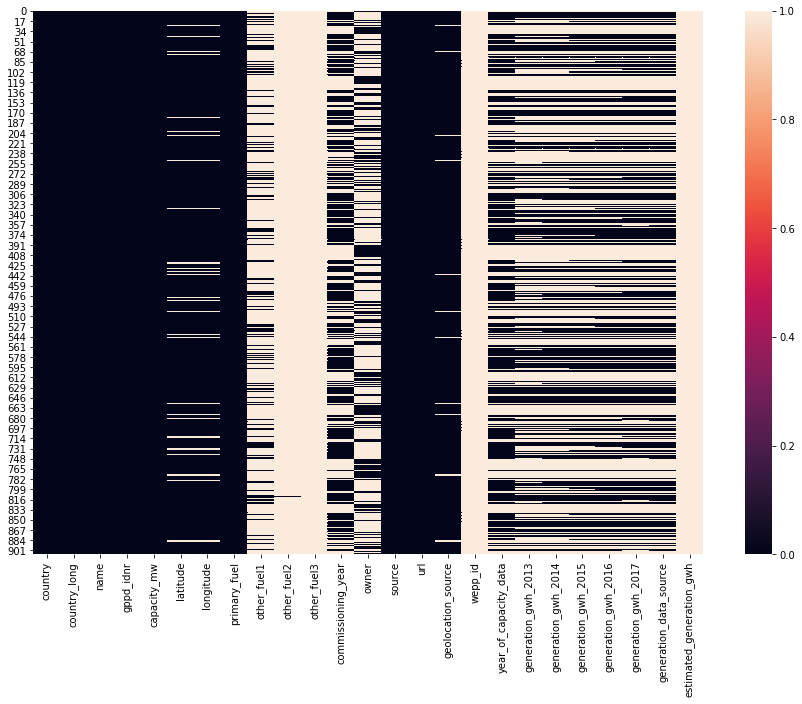

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isna())
plt.show()

Our dataset have few columns which contains only of null values so its better to drop it

In [ ]:
data.drop(columns=['other_fuel2', 'other_fuel3','wepp_id','estimated_generation_gwh'], axis=1, inplace=True)

In [ ]:
data.shape

(908, 21)

We've dropped 4 columns.Here we go.

We ll drop "year_of_capacity_data"

In [ ]:
data.drop(columns='year_of_capacity_data')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(908, 21)

In [ ]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


There is only one year in "year_of_capacity_data" so better to drop

In [ ]:
data.drop(columns='year_of_capacity_data')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(908, 21)

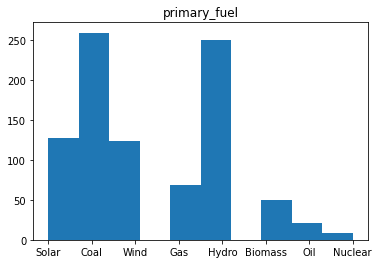

In [ ]:
# Histogram
data['primary_fuel'].hist(grid=False)
plt.title('primary_fuel')
plt.show()

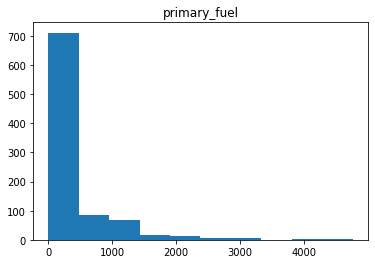

In [ ]:
data['capacity_mw'].hist(grid=False)
plt.title('primary_fuel')
plt.show()

There is high skewness

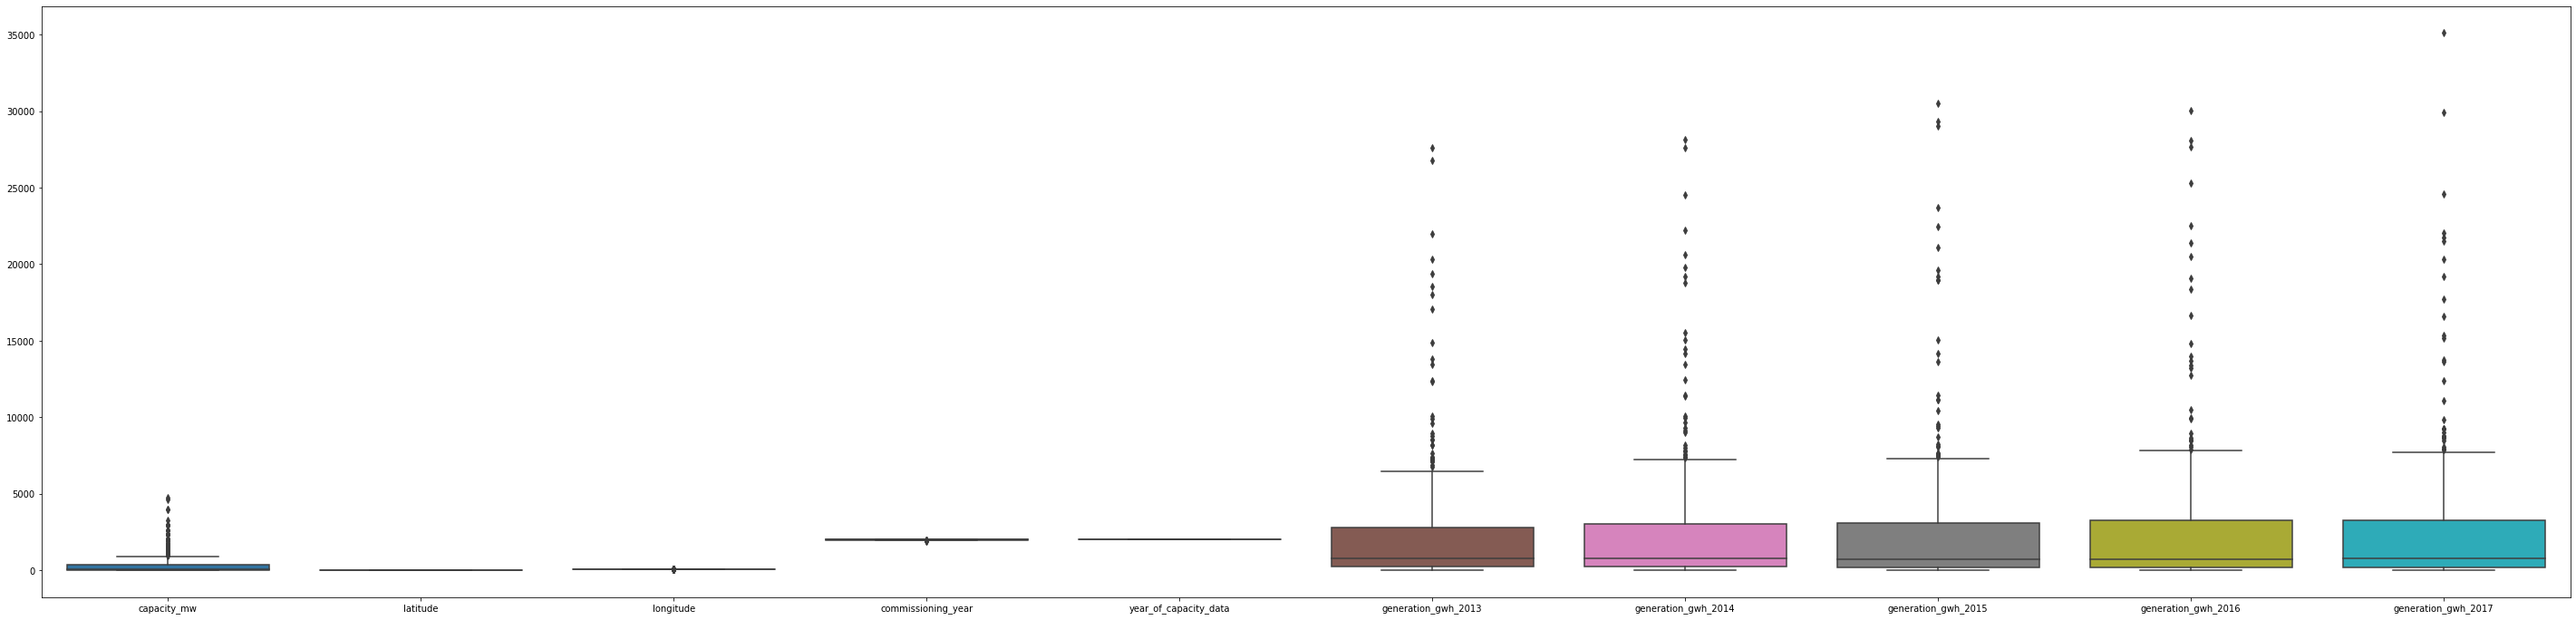

In [ ]:
# plotting a box plot
fig, ax=plt.subplots(1,1,figsize=(50,12))
sns.boxplot(data=data,ax=ax)
plt.show()

As I can see there are many outliers in our dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b5c2edcd0>,
      dtype=object)

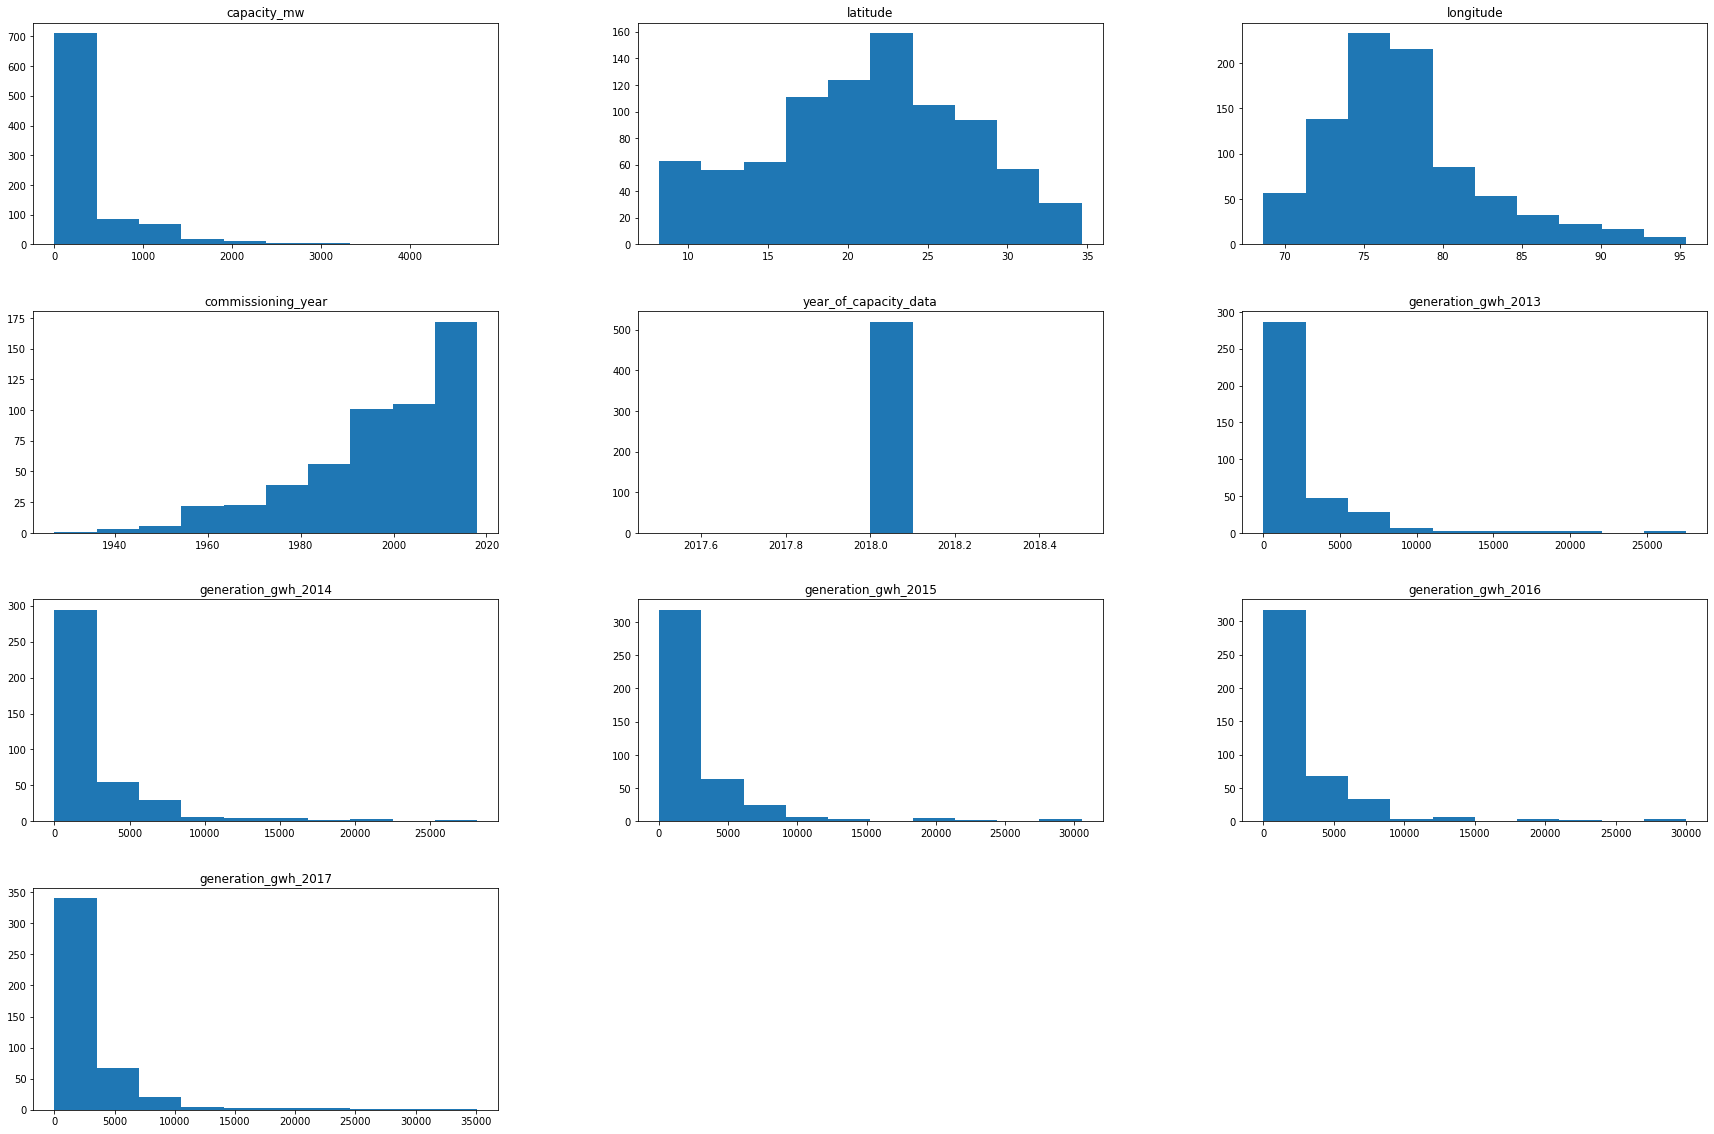

In [ ]:
data.hist(figsize=(30,20), grid=False)

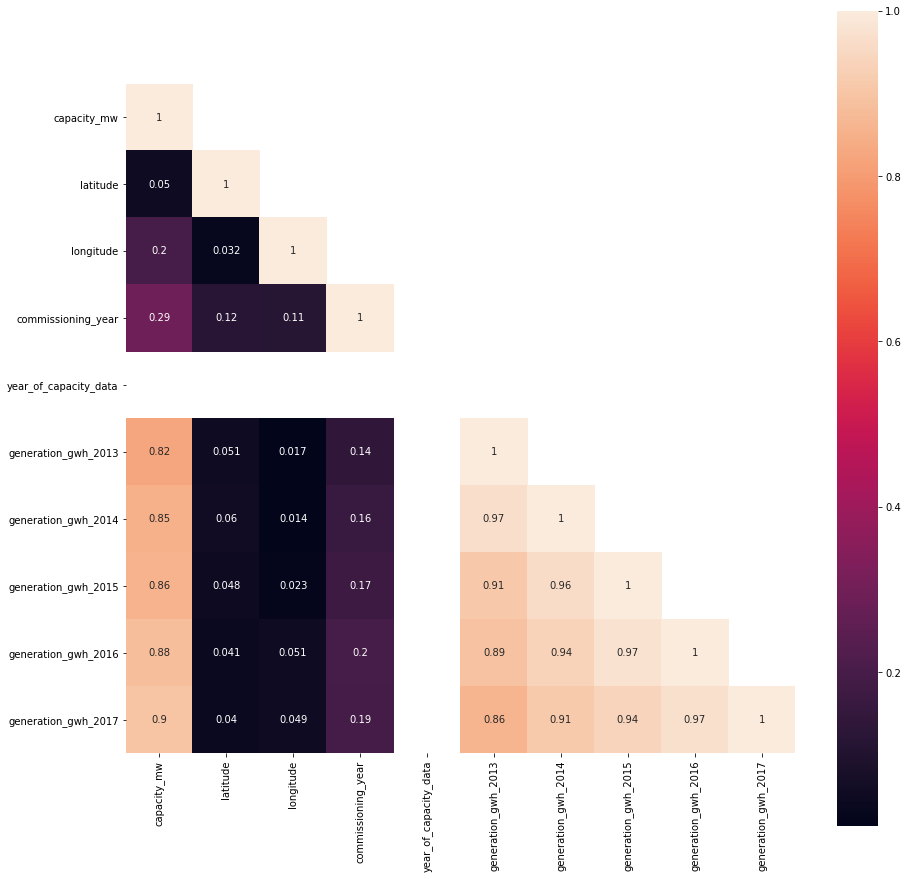

In [ ]:
# correlation matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)]=False

fig = plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=corr_mat, mask=m, square=True, annot=True, cbar=True)

In [ ]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


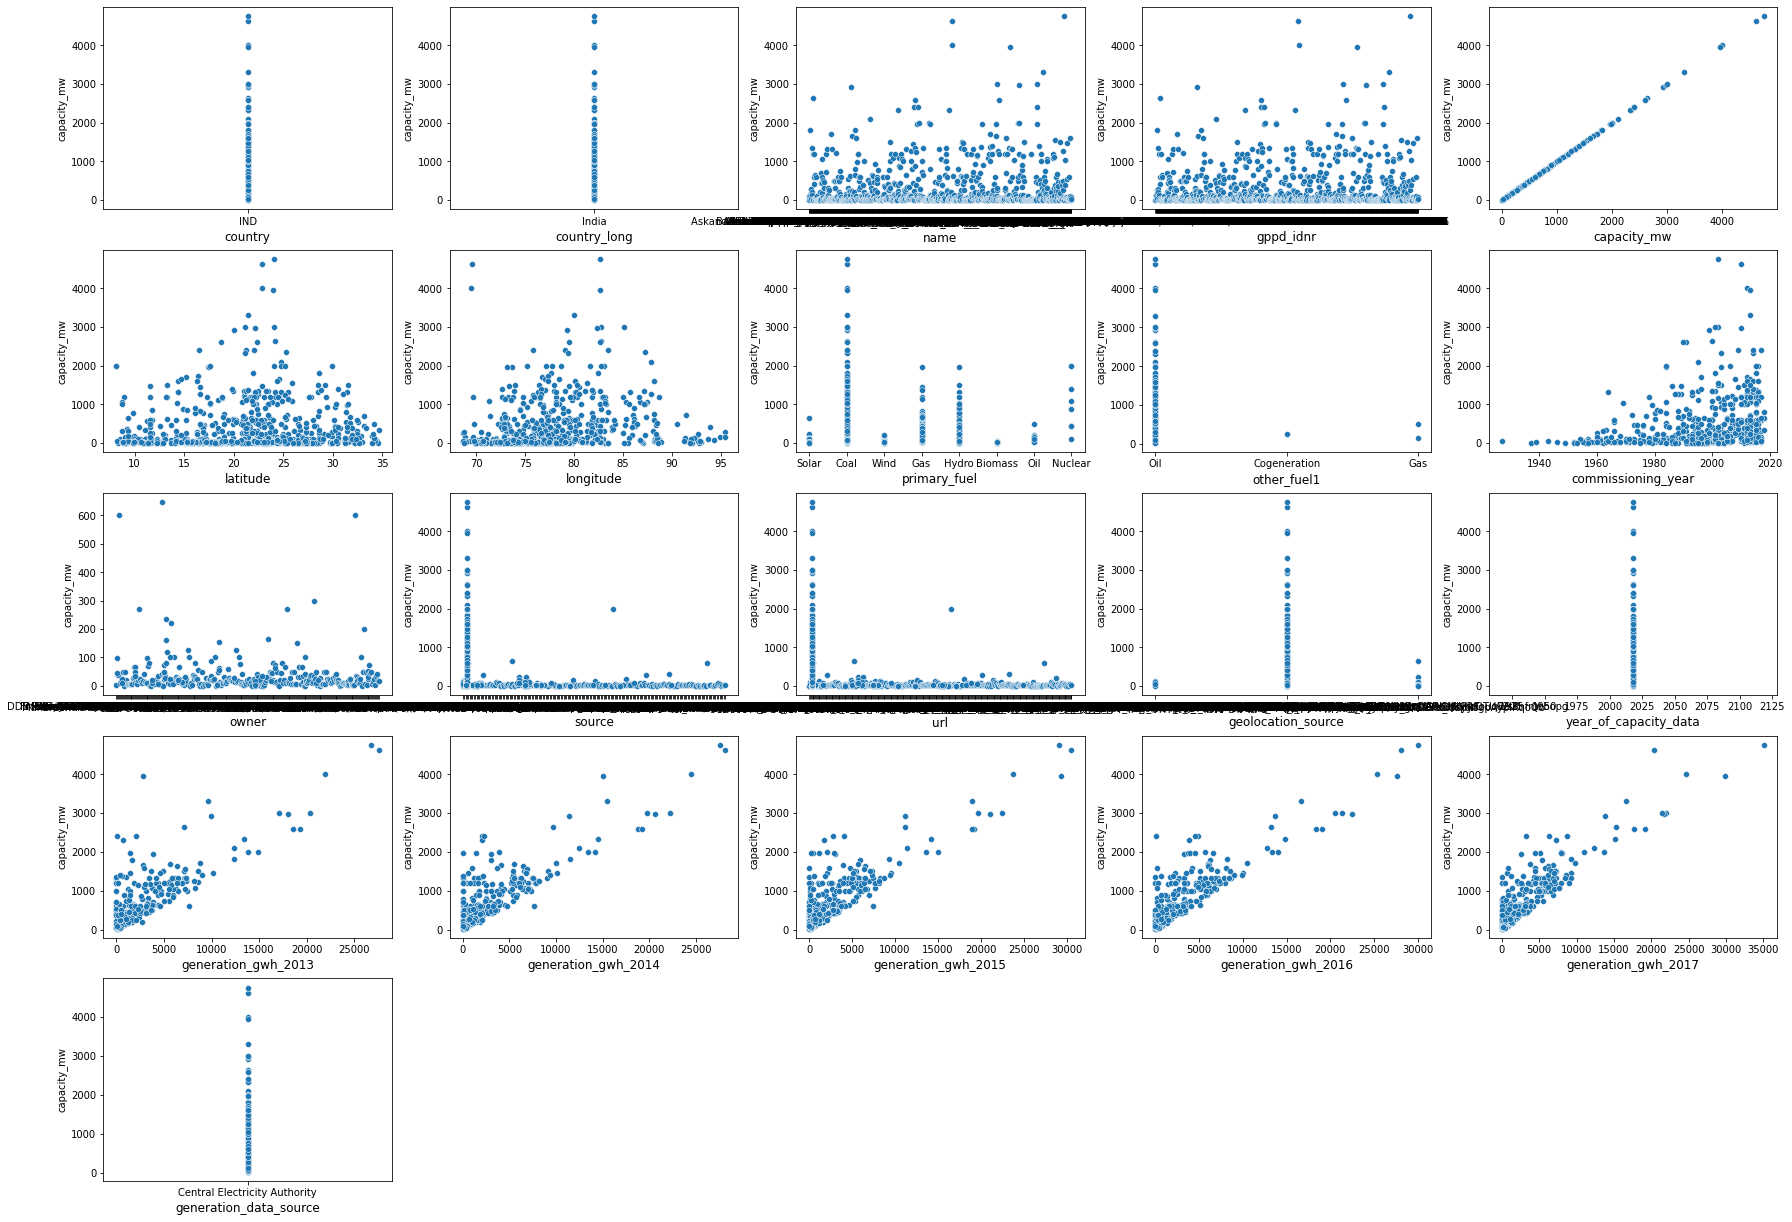

In [ ]:
plt.figure(figsize=(30,35))
graph=1

for column in data:
  if graph<=40:
    ax=plt.subplot(8,5,graph)
    sns.scatterplot(x=data[column], y='capacity_mw', data=data)
    plt.xlabel(column, fontsize=12)
  graph += 1
plt.show()

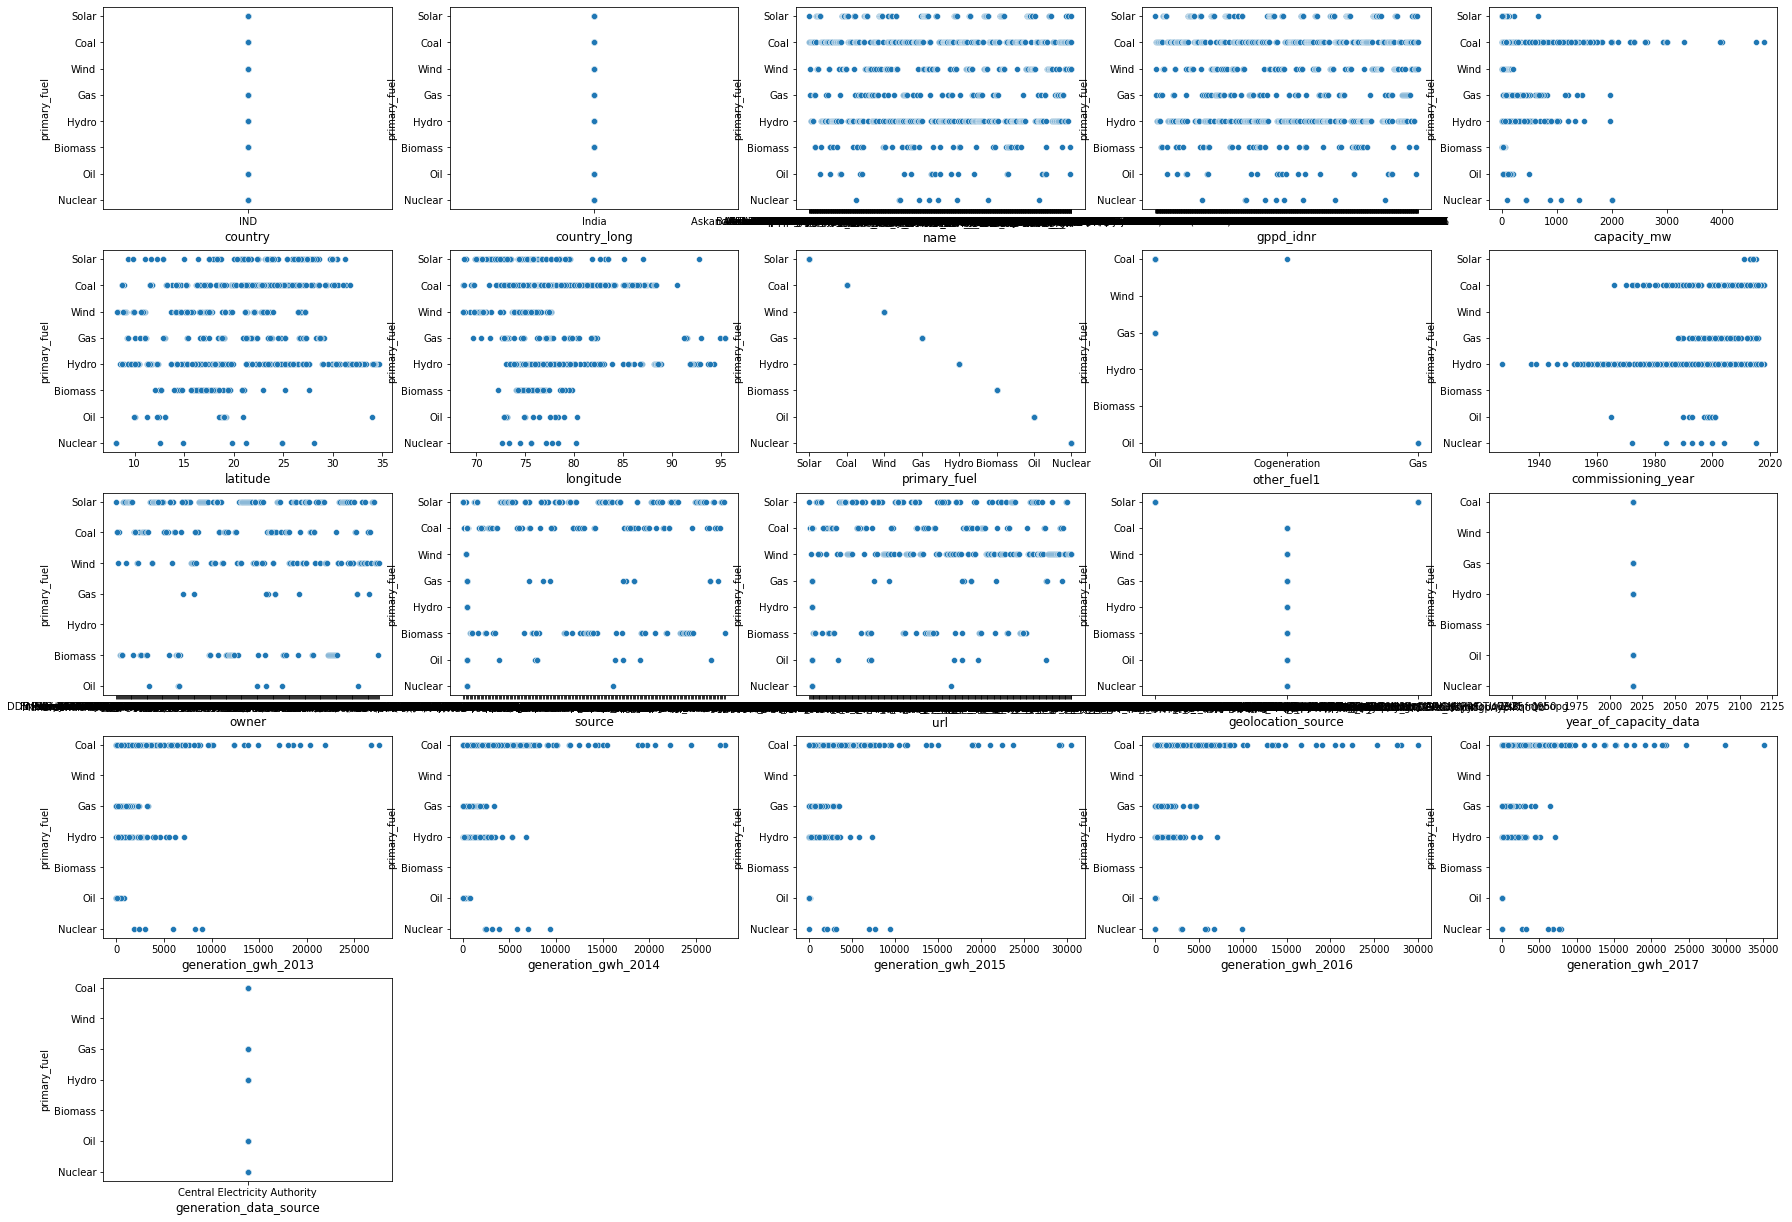

In [ ]:
plt.figure(figsize=(30,35))
graph=1

for column in data:
  if graph<=40:
    ax=plt.subplot(8,5,graph)
    sns.scatterplot(x=data[column], y='primary_fuel', data=data)
    plt.xlabel(column, fontsize=12)
  graph += 1
plt.show()

Some variable do not have any relationship with "primary_fuel"

In [ ]:
data.skew()

capacity_mw              3.193257
latitude                -0.143622
longitude                1.100942
commissioning_year      -1.056132
year_of_capacity_data    0.000000
generation_gwh_2013      3.416338
generation_gwh_2014      3.357683
generation_gwh_2015      3.679016
generation_gwh_2016      3.524785
generation_gwh_2017      3.576849
dtype: float64

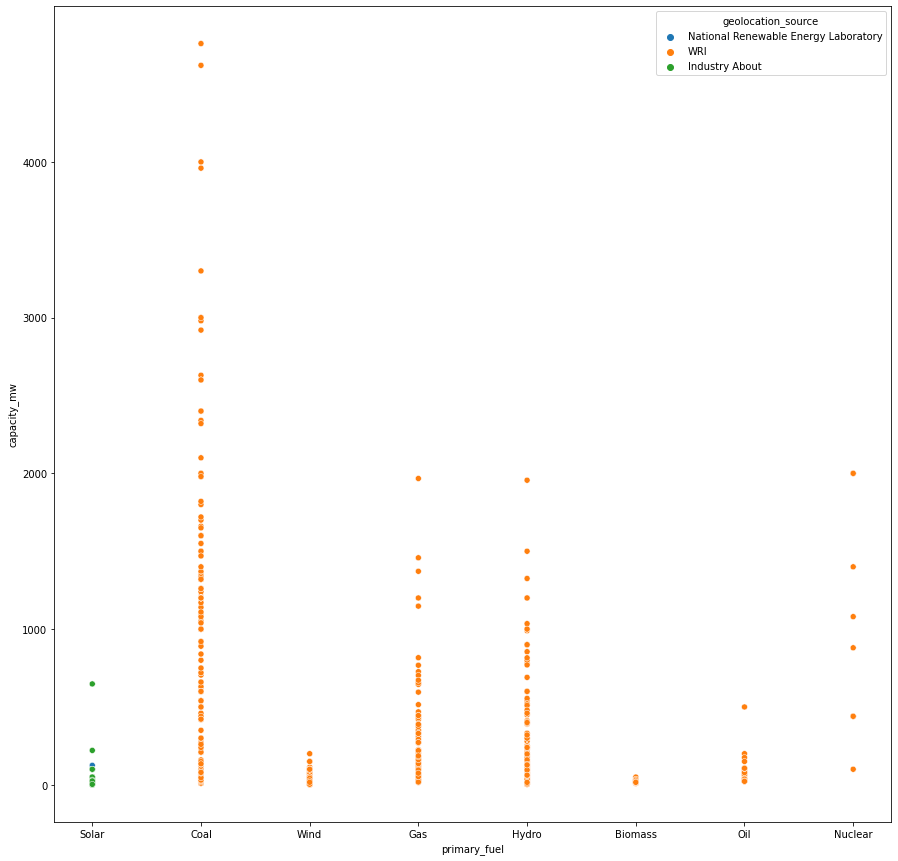

In [ ]:
fig, axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=data)

This scatter plot shows the realtionship between "primary_fuel" and "capacity_mw"

In [ ]:
data['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

There is only "Central Electricity Authority" we can see. better to drop

In [ ]:
data.drop(columns='generation_data_source',axis=1,inplace=True)

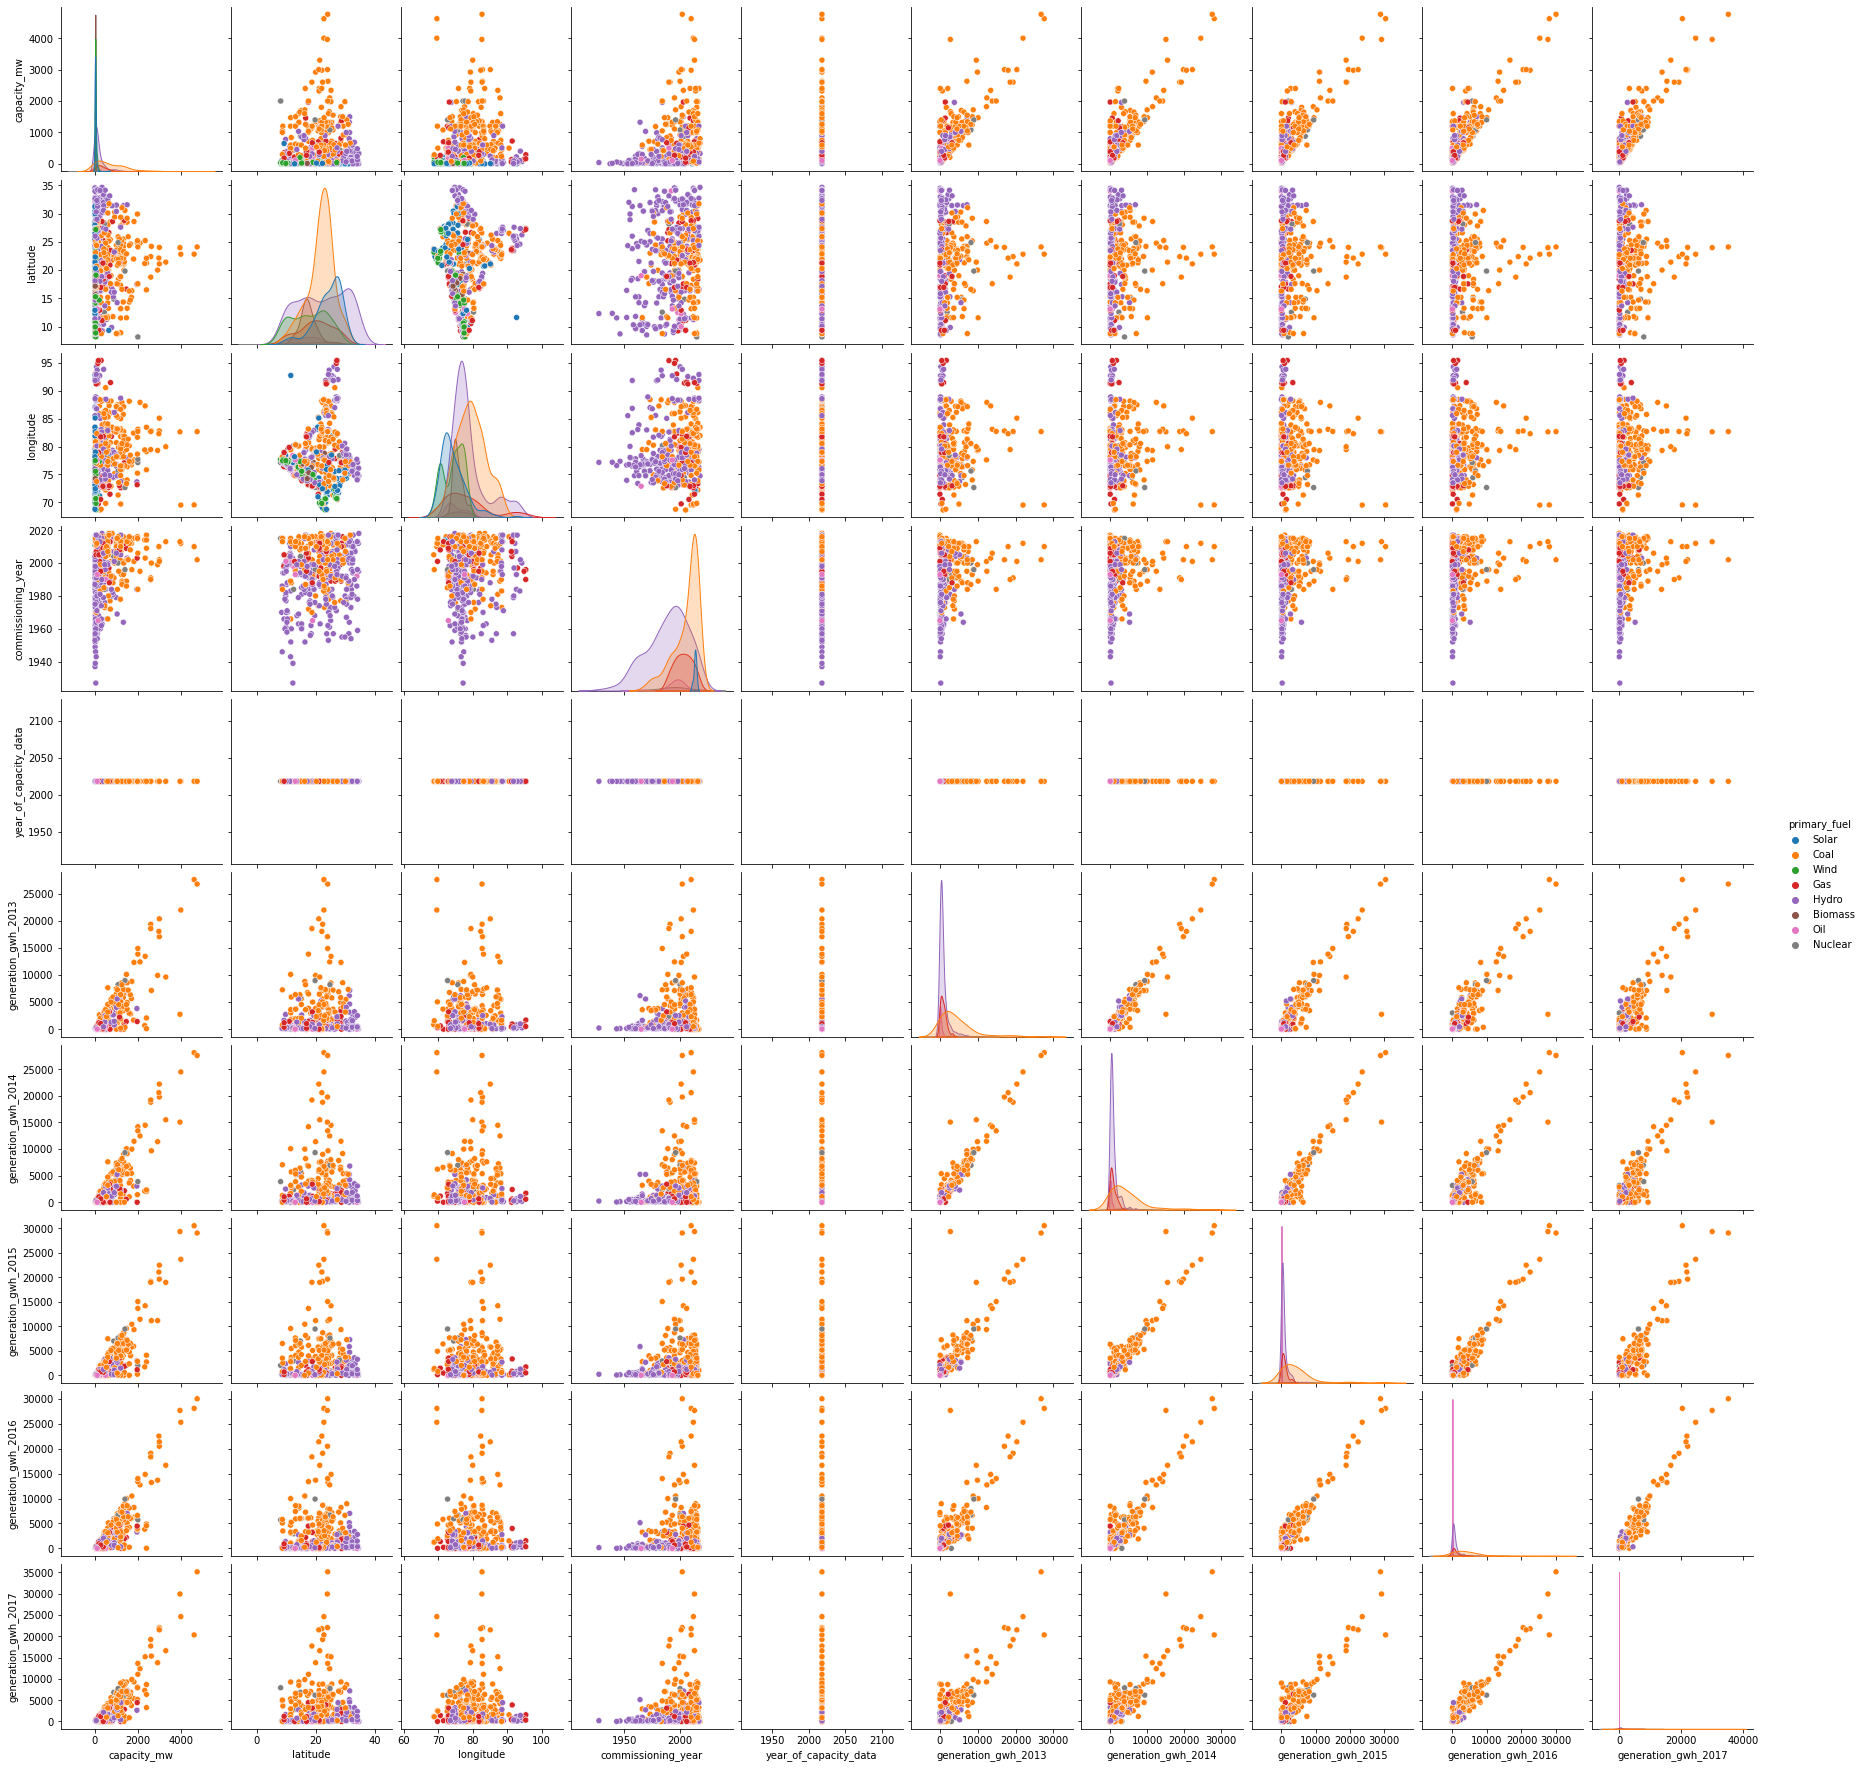

In [ ]:
sns.pairplot(data, hue='primary_fuel')

The coal is associated with high capacity

In [ ]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [ ]:
# handle null values

from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=3)
data_filled = knn_imp.fit_transform(data[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

data1 = pd.DataFrame(data_filled)

In [ ]:
data1.columns = ['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
data1

,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,3755.316333,3944.878833,3099.436000,3974.844133,4601.658333
1,24.7663,74.6090,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,21.9038,69.3732,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,23.8712,91.3602,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...
903,16.2949,77.3568,200.530000,81.211333,0.994875,233.596650,865.400000
904,12.8932,78.1654,259.705351,221.352445,125.761164,41.617533,1685.693383
905,15.2758,75.5811,169.614333,96.796917,63.411350,37.395417,61.474417
906,24.3500,73.7477,781.667033,1143.319383,965.062900,828.058550,1281.792517


In [ ]:
data['latitude'] = data1['latitude']
data['longitude'] = data1['longitude']
data['generation_gwh_2013'] = data1['generation_gwh_2013']
data['generation_gwh_2014'] = data1['generation_gwh_2014']
data['generation_gwh_2015'] = data1['generation_gwh_2015']
data['generation_gwh_2016'] = data1['generation_gwh_2016']
data['generation_gwh_2017'] = data1['generation_gwh_2017']
data['other_fuel1'] = data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])
data['owner'] = data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['commissioning_year'] = data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['year_of_capacity_data'] = data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])

data.isna().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [ ]:
data.drop(columns='year_of_capacity_data')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,3755.316333,3944.878833,3099.436000,3974.844133,4601.658333
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,200.530000,81.211333,0.994875,233.596650,865.400000
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,259.705351,221.352445,125.761164,41.617533,1685.693383
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2013.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,169.614333,96.796917,63.411350,37.395417,61.474417
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,781.667033,1143.319383,965.062900,828.058550,1281.792517


Dealing with null values of categorical variable

In [ ]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

In [ ]:
data['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [ ]:
data['name'].value_counts()

UDUPI TPP                           1
ROSA TPP PH - 1                     1
Gadag Wind Farm                     1
YERMARUS TPP                        1
Gadna 1 Solar Power Plant           1
                                   ..
Weizzmann Forex Idukki Wind Farm    1
Powerica Tirunelveli Wind Farm      1
UKAI LBC                            1
BOKARO A ''EXP''                    1
BHIVPURI                            1
Name: name, Length: 908, dtype: int64

'Name' is something unique we can't do anything about it so better to drop it.

In [ ]:
data['gppd_idnr'].value_counts()

WRI1019904    1
IND0000370    1
WRI1026768    1
WRI1026133    1
WRI1026766    1
             ..
WRI1019949    1
IND0000102    1
IND0000110    1
WRI1020245    1
IND0000267    1
Name: gppd_idnr, Length: 908, dtype: int64

It seems like this columns dosen't give much information so better to drop it

In [ ]:
data.drop(columns=['name','gppd_idnr','country','country_long'], axis=1, inplace=True)

Columns dropped successfully.

In [ ]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [ ]:
# treating the outliers

# finding the quantile of data with continuos columns

col = data.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3-Q1

# Removing outlier using IQR method

data_new = col[~((col<(Q1-1.5*IQR)) | (col>(Q3+1.5*IQR))).any(axis=1)]
print('Shape before and after')
print('shape before',col.shape)
print('shape after',data_new.shape)
print('Percentage loss : ',(col.shape[0]-data_new.shape[0])/(col.shape[0]))

Shape before and after
shape before (908, 10)
shape after (666, 10)
Percentage loss :  0.2665198237885463


Here we are loosing 26% of data. can't use this.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# apply label encoder

a = le.fit_transform(data['primary_fuel'])
b = le.fit_transform(data['other_fuel1'])
c = le.fit_transform(data['owner'])
d = le.fit_transform(data['source'])
e = le.fit_transform(data['url'])
f = le.fit_transform(data['geolocation_source'])

In [ ]:
data['primary_fuel'] = a
data['other_fuel1'] = b
data['owner'] = c
data['source'] = d
data['url'] = e
data['geolocation_source'] = f
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,2011.0,229,109,128,1,2018.0,3755.316333,3944.878833,3099.436000,3974.844133,4601.658333
1,98.0,24.7663,74.6090,1,2,2013.0,258,174,173,2,2018.0,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,7,2,2013.0,2,21,205,2,2018.0,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2,2,2004.0,5,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2016.0,5,22,58,2,2018.0,200.530000,81.211333,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,2013.0,114,77,22,0,2018.0,259.705351,221.352445,125.761164,41.617533,1685.693383
905,25.5,15.2758,75.5811,7,2,2013.0,5,21,260,2,2018.0,169.614333,96.796917,63.411350,37.395417,61.474417
906,80.0,24.3500,73.7477,1,2,2013.0,91,59,82,2,2018.0,781.667033,1143.319383,965.062900,828.058550,1281.792517


Substituted the values and reading the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b521881d0>,
      dtype=object)

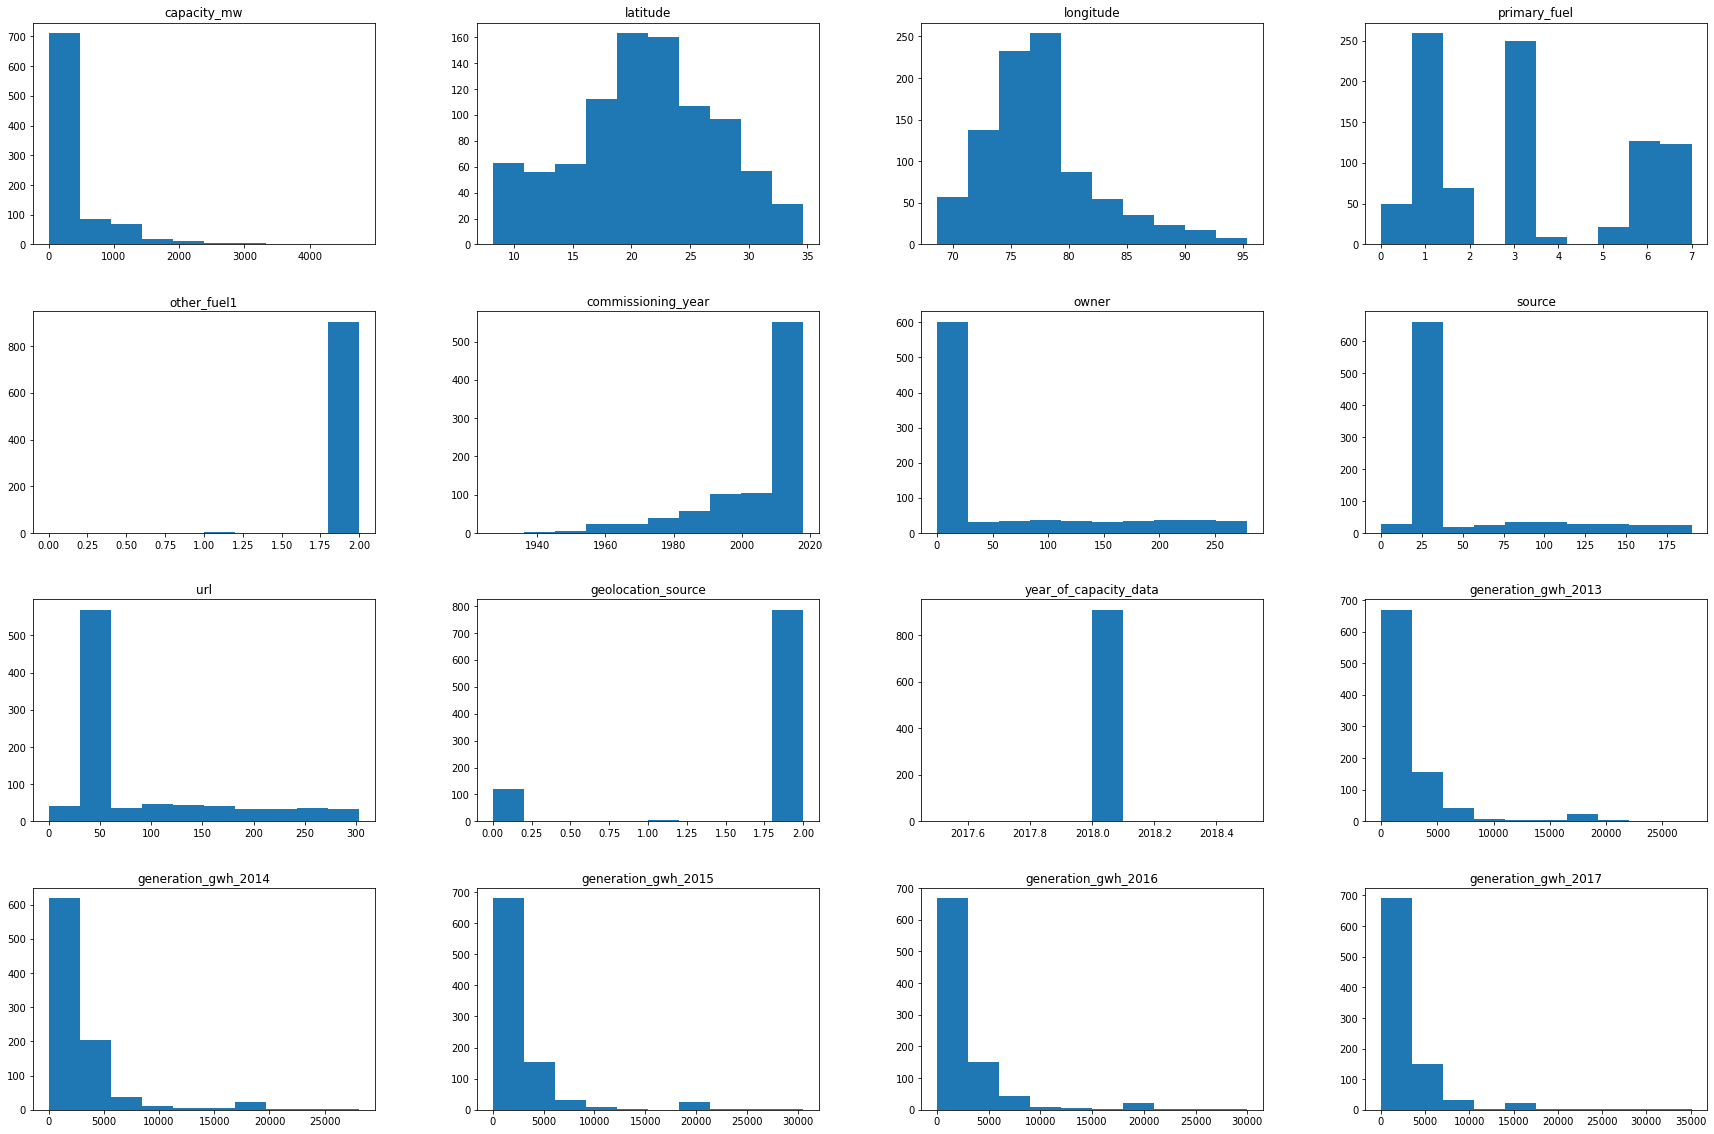

In [ ]:
data.hist(figsize=(30,20), grid=False)

Looks like data is less skewed

## Model with target variable : primary_fuel

In [ ]:
y1 = data['primary_fuel']
x1 = data.drop(['primary_fuel'],axis=1)

# Splitting the data

In [ ]:
# handling the class imbalance problem by oversampling

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over,Y_over = SM.fit_resample(x1,y1)

Dealing with problem of class imbalance

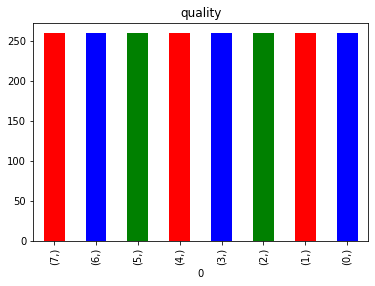

In [ ]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar',title='quality',color = ['r','b','g'])

The classes are equal

In [ ]:
ydata = pd.Series(Y_over)
ydata.head()

0    6
1    1
2    7
3    2
4    1
dtype: int64

Converted data into Series

In [ ]:
xdata = pd.DataFrame(X_over)
xdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.5,28.1839,73.2407,2.0,2011.0,229.0,109.0,128.0,1.0,2018.0,3755.316333,3944.878833,3099.436000,3974.844133,4601.658333
1,98.0,24.7663,74.6090,2.0,2013.0,258.0,174.0,173.0,2.0,2018.0,3040.819933,2531.734217,298.881417,265.260367,241.997267
2,39.2,21.9038,69.3732,2.0,2013.0,2.0,21.0,205.0,2.0,2018.0,1941.346333,2420.079333,1942.164800,2280.040517,1644.988333
3,135.0,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2.0,2015.0,5.0,22.0,58.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [ ]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

Converted xdata into DataFrame

In [ ]:
xdata.columns = ['capacity_mw', 'latitude', 'longitude', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
        'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015',
        'generation_gwh_2016', 'generation_gwh_2017']
xdata.head()

ValueError: ignored

In [ ]:
xdata['generation_gwh_2016'].sum()

KeyError: ignored

In [ ]:
xdata['generation_gwh_2016']

KeyError: ignored